In [7]:
import pandas as pd

# Section 1 Overall approach

## Data Part

1. We scraped property data from **Domain**, utilizing the **OpenStreetMap API** to convert property addresses into geographical coordinates.
2. Property prices on the website were listed in various formats. We standardized all prices to **weekly rent** to maintain consistency.
3. We collected coordinates for **schools** and **stations** from publicly available online sources.
4. We manually compiled a file containing **shopping center coordinates** for the analysis.


In [8]:
properties_with_closest_shopping_centers_path = '../data/curated/properties_with_closest_shopping_centers.csv'
properties_with_closest_shopping_centers = pd.read_csv(properties_with_closest_shopping_centers_path)
properties_with_closest_shopping_centers.head(10)


,Property Name,Property Latitude,Property Longitude,Closest Station,Distance (km),cost_text,Closest School,School Distance (km),SA2_NAME21,Closest Shopping Center,Distance to Closest Shopping Center (km)
0,"6/137 Coppin St, Richmond VIC 3121",-37.820283,145.003572,East Richmond,0.882026,$425 weekly,Richmond High School,0.326233,Richmond (South) - Cremorne,Northland Shopping Centre,9.543373
1,"205/6 Joseph Road, Footscray VIC 3011",-37.798238,144.914181,South Kensington,0.990486,$510 per week,St Monica's School,0.723669,Footscray,Highpoint Shopping Centre,3.431348
2,"8/7 Docker St, Richmond VIC 3121",-37.823681,144.997096,East Richmond,0.308573,$425 weekly,Richmond Primary School,0.676342,Richmond (South) - Cremorne,Northland Shopping Centre,10.037550
3,"8/51 Kooyong Road, Armadale VIC 3143",-37.862342,145.019539,Armadale,0.658460,$375 per week,The King David School,0.917637,Armadale,Chadstone Shopping Centre,6.446263
4,"10/54 Rockley Road, South Yarra VIC 3141",-37.835164,145.000360,South Yarra,0.785119,$475 pw,Kamaruka,0.360197,South Yarra - North,Chadstone Shopping Centre,9.419477
5,"4/24 Brisbane Street, Murrumbeena VIC 3163",-37.885893,145.069142,Murrumbeena,0.509253,$380 weekly,Murrumbeena Primary School,0.115611,Murrumbeena,Chadstone Shopping Centre,1.574053
6,"106/52 Darling Street, South Yarra VIC 3141",-37.833630,144.991076,South Yarra,0.522136,$525 pw,Melbourne High School,0.514997,South Yarra - North,Chadstone Shopping Centre,10.186518
7,"1508/2 Joseph Road, Footscray VIC 3011",-37.798991,144.910753,Footscray,0.750591,$500per week,St Monica's School,0.420729,Footscray,Highpoint Shopping Centre,3.321985
8,"12/63 Alexandra Avenue, South Yarra VIC 3141",-37.834286,144.994412,South Yarra,0.475469,$700.00,Melbourne High School,0.293165,South Yarra - North,Chadstone Shopping Centre,9.903024
9,"29/4 Wando Grove, St Kilda East VIC 3183",-37.860826,145.008392,Armadale,1.081804,$330 per week,The King David School,0.342788,St Kilda East,Chadstone Shopping Centre,7.418464


We grouped the data and calculate the average distance of every features, and median price for each suburb.

In [11]:

grouped_avg_properties_path = '../data/curated/grouped_avg_properties_sa2.csv'


grouped_avg_properties = pd.read_csv(grouped_avg_properties_path)

grouped_avg_properties.head(10)


,SA2_NAME21,Distance (km),School Distance (km),Distance to Closest Shopping Center (km),Price
0,Abbotsford,0.749009,0.466914,8.159577,680.0
1,Airport West,3.646777,0.495533,5.746322,830.0
2,Albert Park,2.291446,0.391343,10.058623,797.5
3,Alfredton,3.456293,0.877199,87.816964,475.0
4,Alphington - Fairfield,0.322991,0.496736,4.718248,545.0
5,Altona,0.602537,0.513213,11.153748,862.5
6,Altona Meadows,2.164400,0.718317,7.471010,550.0
7,Altona North,2.633912,0.686030,7.298112,735.0
8,Ararat,0.564885,0.346323,168.419598,395.0
9,Ararat Surrounds,10.480487,6.254229,176.629839,550.0


Normalize the distance and calculate the liveability score for each district.

In [1]:
import pandas as pd

file_path = '../data/curated/liveability_scores.csv'
liveability_data = pd.read_csv(file_path)

liveability_data.head(10)


,SA2_NAME21,Liveability Score
0,Bayswater North,0.981947
1,West Footscray - Tottenham,0.981533
2,Clayton (North) - Notting Hill,0.974572
3,Preston - West,0.973412
4,Noble Park - East,0.971749
5,Deer Park,0.969496
6,Carnegie,0.968636
7,Preston - East,0.968396
8,Northcote - East,0.965042
9,Noble Park - West,0.964306


with openstreet basemap.

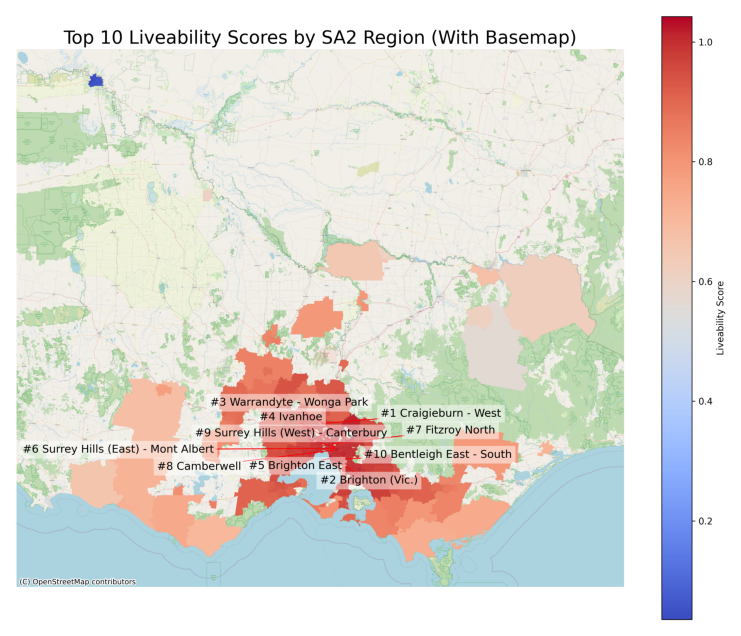

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '../plots/liveability_scores_map_with_basemap_top10_ranked.png'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


We clean the historical dataset and calculate every quarter increase rate. 

In [9]:
increase_rates_path = '../data/curated/increase_rates.csv'
expanded_cleaned_properties_path = '../data/curated/expanded_cleaned_properties.csv'

expanded_cleaned_properties = pd.read_csv(expanded_cleaned_properties_path)
increase_rates = pd.read_csv(increase_rates_path)

expanded_cleaned_properties.head(10), increase_rates.head(10)


(   Mar 2022 Median Rent  Jun 2022 Median Rent  Sep 2022 Median Rent  \
 0                 500.0                 515.0                 500.0   
 1                 500.0                 515.0                 500.0   
 2                 500.0                 515.0                 500.0   
 3                 430.0                 450.0                 450.0   
 4                 580.0                 595.0                 600.0   
 5                 310.0                 319.0                 340.0   
 6                 310.0                 319.0                 340.0   
 7                 365.0                 390.0                 419.0   
 8                 365.0                 390.0                 419.0   
 9                 430.0                 450.0                 480.0   
 
    Dec 2022 Median Rent  Mar 2023 Median Rent  Mar 2017 Median Rent  \
 0                 525.0                 545.0                 500.0   
 1                 525.0                 545.0                

## Model (prediction)

We use the linear regression model to predict next three years rental price.( It is a poor model, so we didnt use it in the end.)

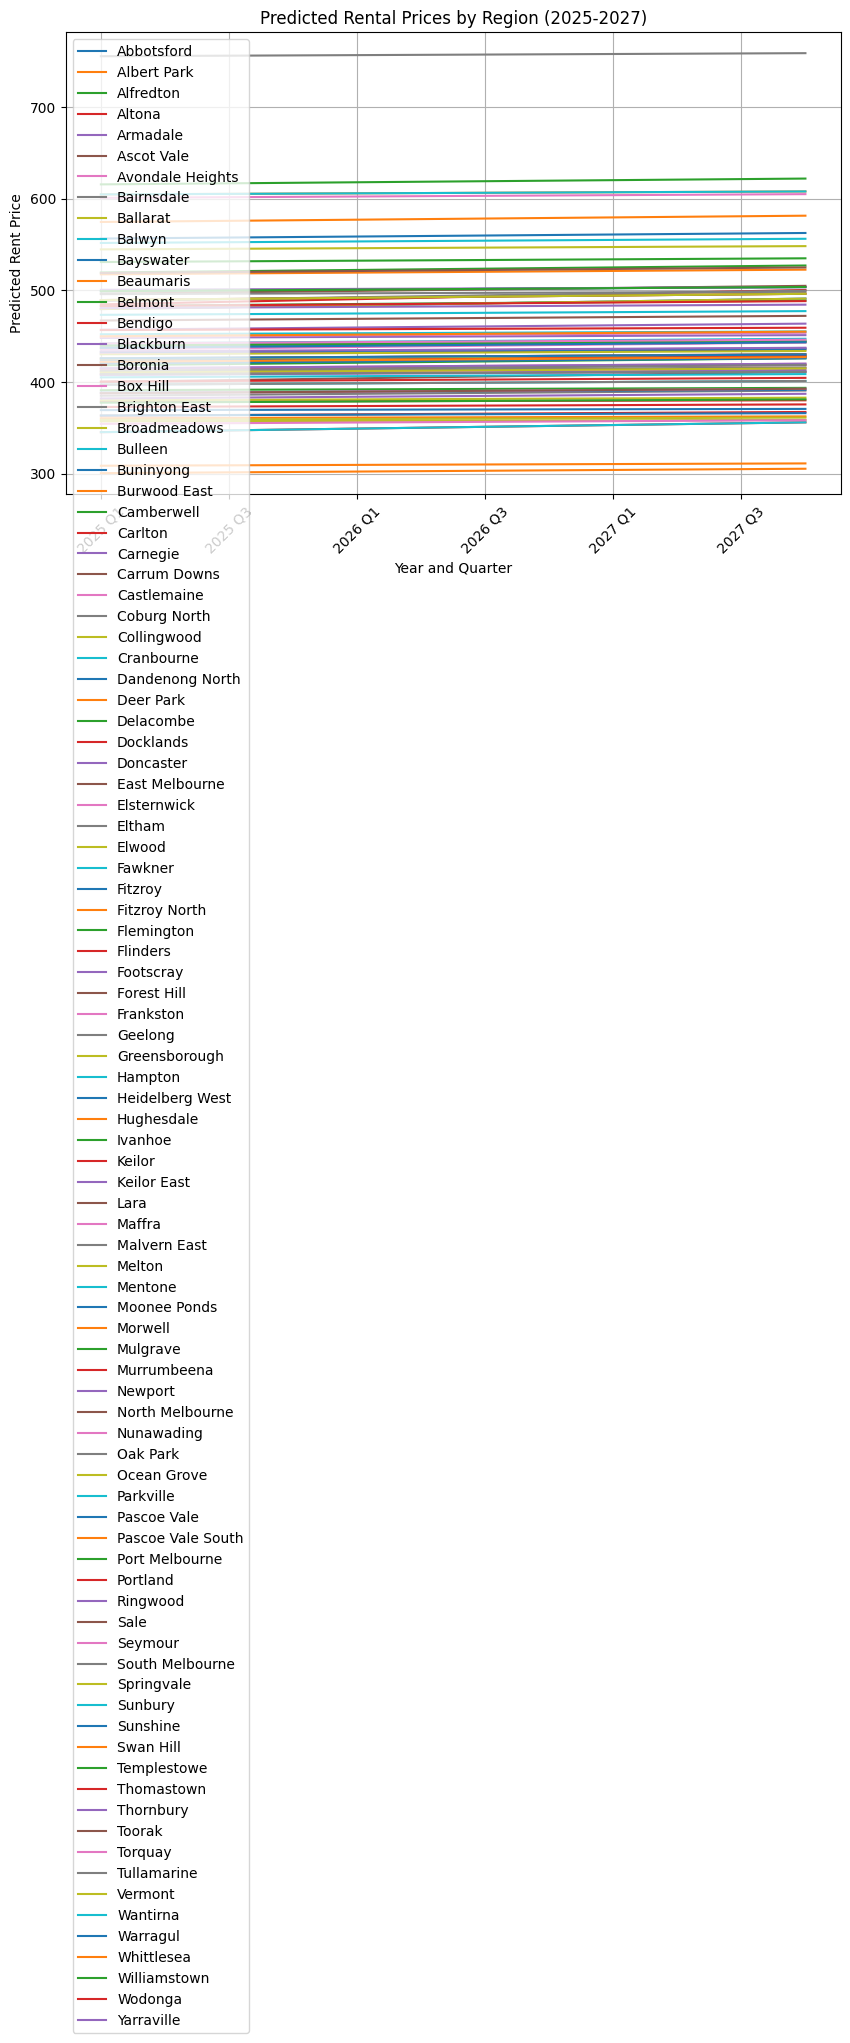

In [12]:
import matplotlib.pyplot as plt

model_predictions_path = '../data/curated/model_lr_distances.csv'
model_predictions_df = pd.read_csv(model_predictions_path, index_col=0)

plt.figure(figsize=(10, 6))
model_predictions_df.plot(ax=plt.gca())
plt.title('Predicted Rental Prices by Region (2025-2027)')
plt.xlabel('Year and Quarter')
plt.ylabel('Predicted Rent Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


then the ARIMA model

/tmp/ipykernel_800/3676195560.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


<function matplotlib.pyplot.show(close=None, block=None)>

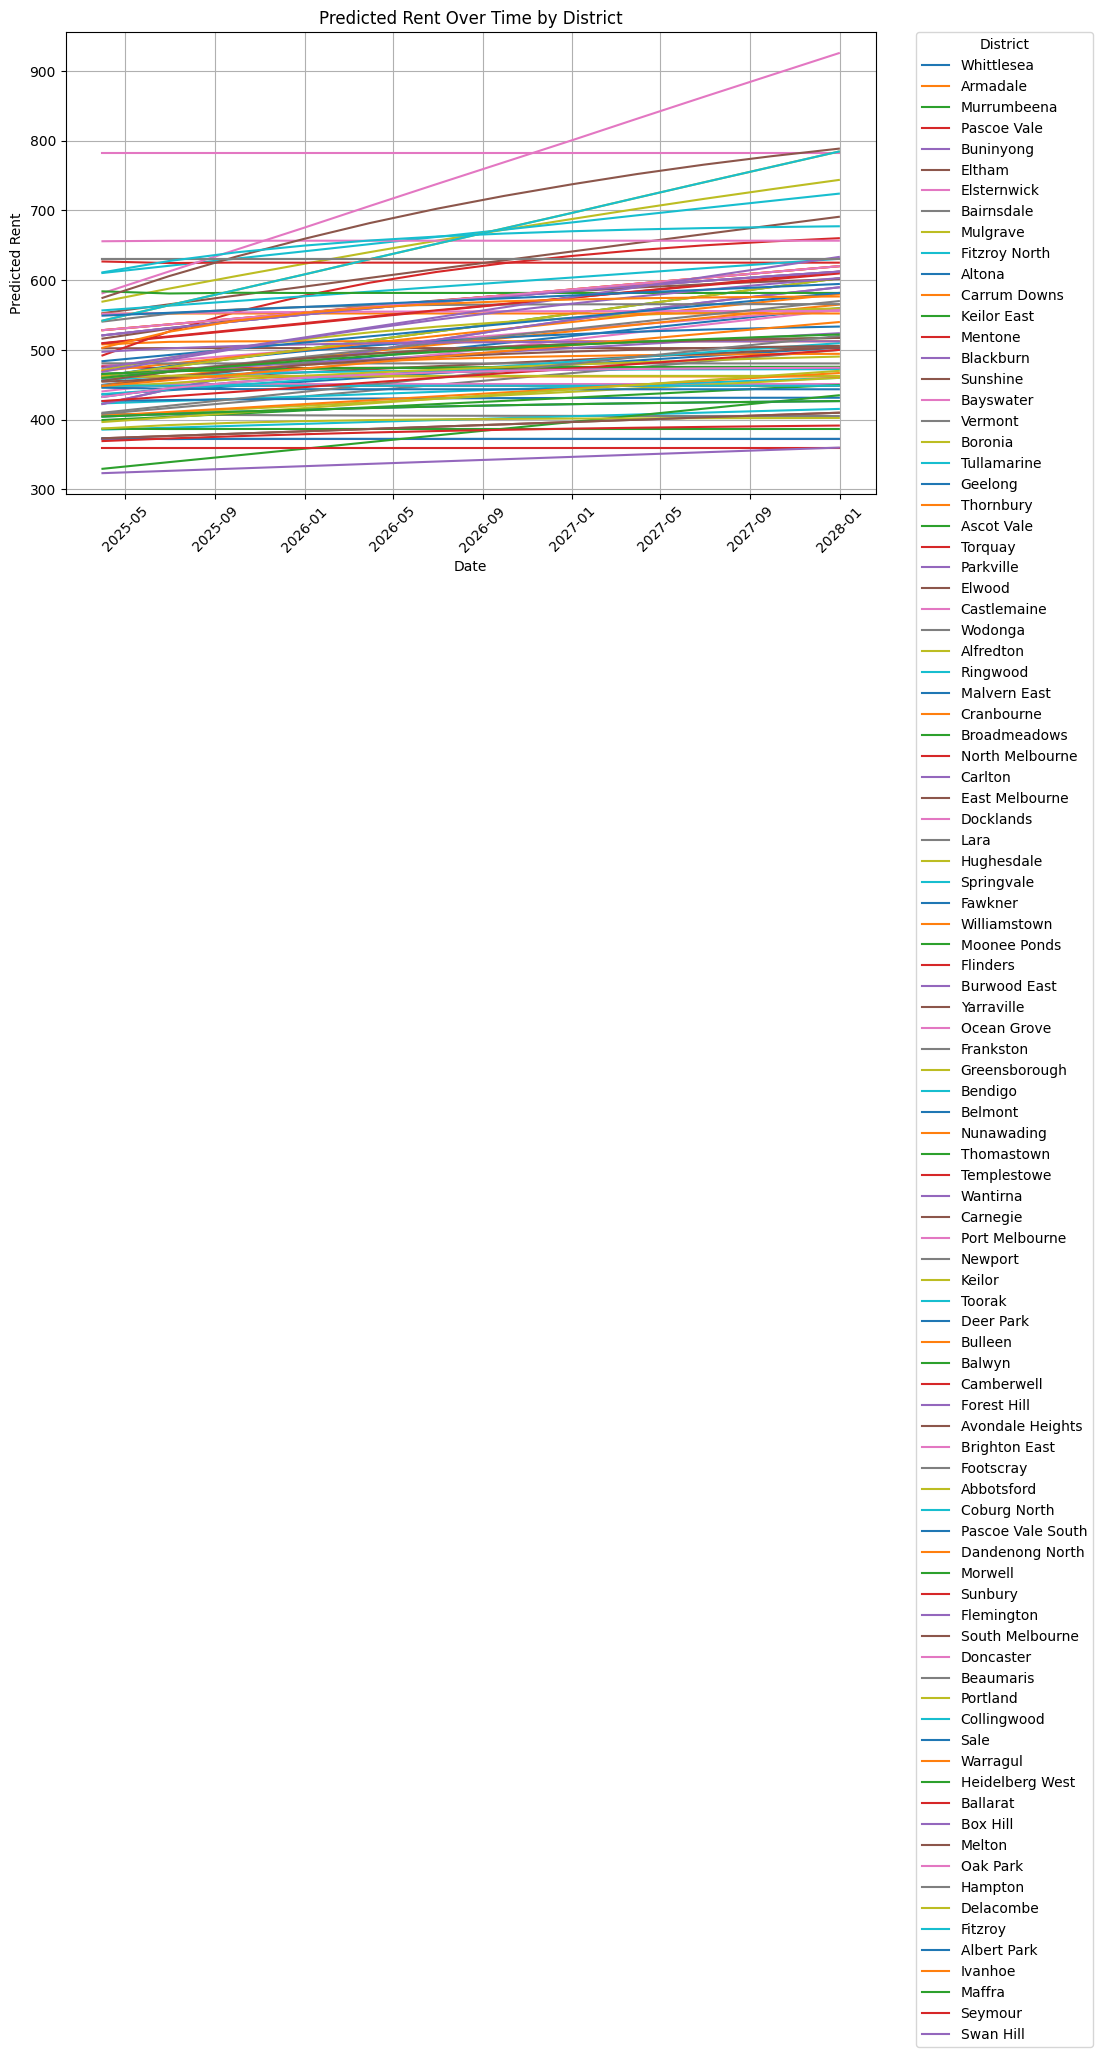

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../data/curated/arima_2025_2027.csv'
output_file_path = './plots/predicted_rent.png'

df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
for district in df['District'].unique():
    district_data = df[df['District'] == district]
    plt.plot(district_data['Date'], district_data['Predicted_Rent'], label=district)

plt.title('Predicted Rent Over Time by District')
plt.xlabel('Date')
plt.ylabel('Predicted Rent')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.subplots_adjust(right=0.8)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show



the ARIMA model

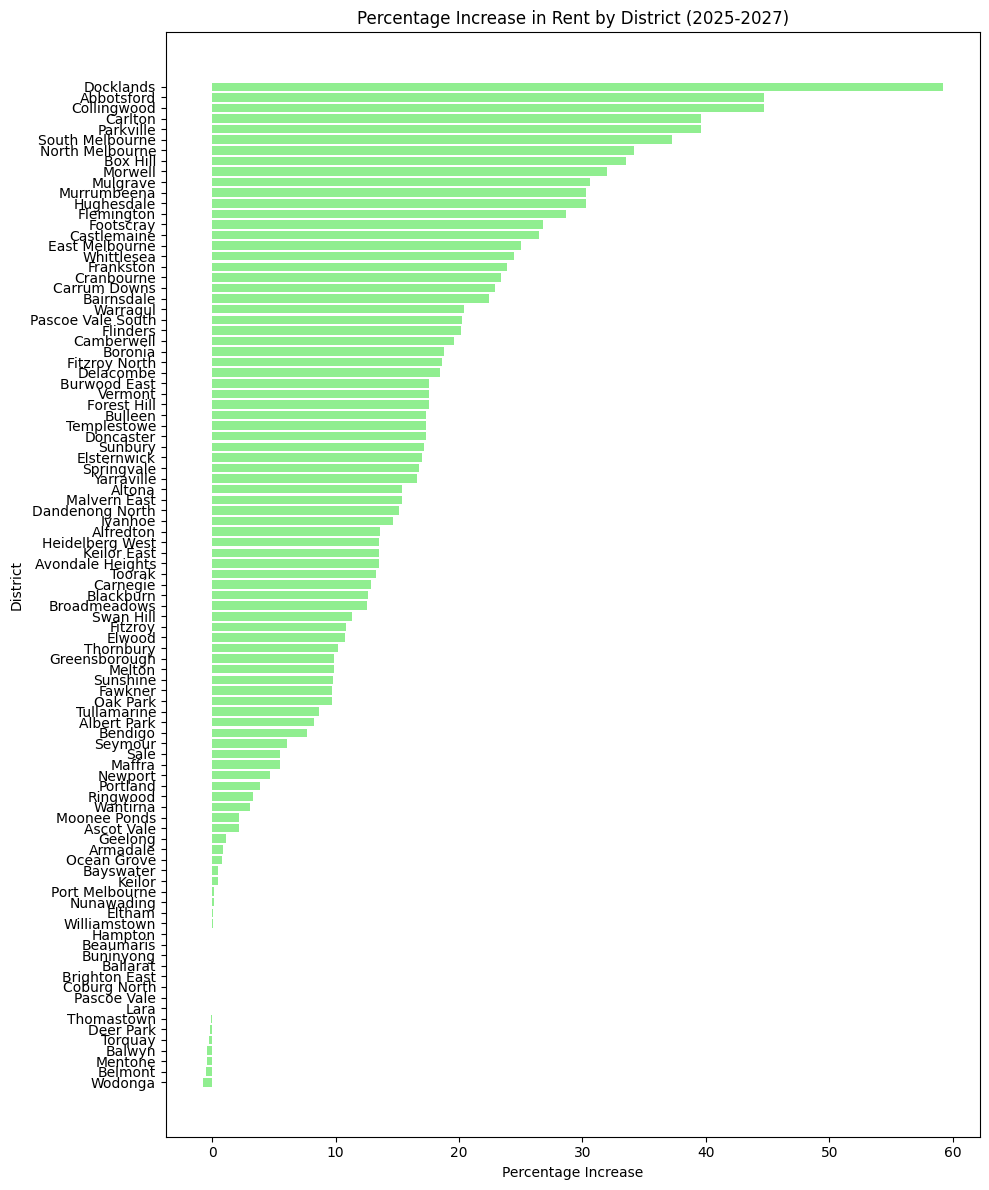

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../data/curated/arima_increase_rates_2025_2027.csv'
increase_data = pd.read_csv(file_path)

sorted_increase_data = increase_data.sort_values(by='Percentage_Increase', ascending=False)
plt.figure(figsize=(10, 12))
plt.barh(sorted_increase_data['District'], sorted_increase_data['Percentage_Increase'], color='lightgreen')
plt.xlabel('Percentage Increase')
plt.ylabel('District')
plt.title('Percentage Increase in Rent by District (2025-2027)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


top 10 increase rate districts.

In [8]:
import pandas as pd

increase_data = pd.read_csv('../data/curated/arima_increase_rates_2025_2027.csv')

top_10_increase = increase_data.sort_values(by='Percentage_Increase', ascending=False).head(10)

print(top_10_increase)




           District  Percentage_Increase
36        Docklands            59.219455
68       Abbotsford            44.721162
79      Collingwood            44.721162
34          Carlton            39.572511
24        Parkville            39.572511
75  South Melbourne            37.229545
33  North Melbourne            34.162099
84         Box Hill            33.490570
72          Morwell            31.984548
8          Mulgrave            30.643085


With basemap

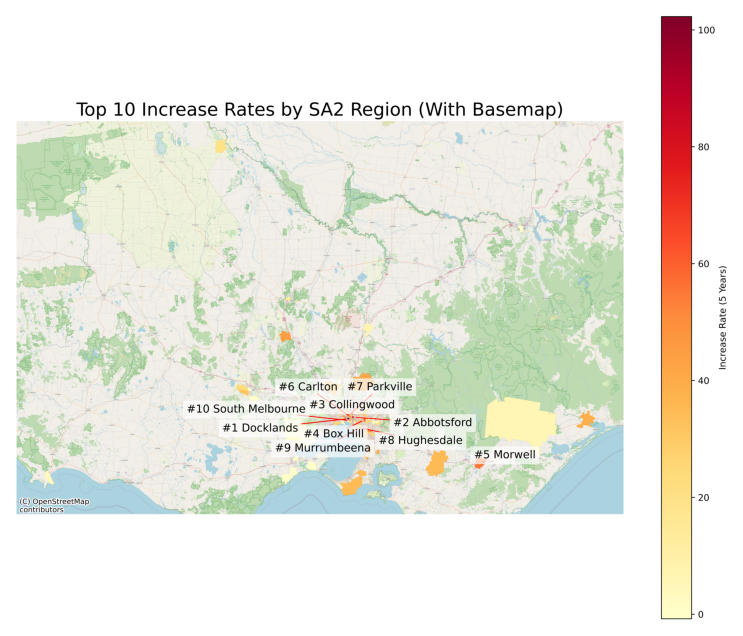

In [3]:
image_path = '../plots/increase_rates_map_with_basemap_top10_ranked.png'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


# Conclusion Based on Maps and Data

## 1. Top 10 Increase Rates by SA2 Region (Map with Basemap)
- The areas with the highest increase rates over the next 5 years are highlighted on the map. 
- Key regions include **Docklands**, **Collingwood**, **Abbotsford**, **Box Hill**, and **Murrumbeena**.
- These areas show strong growth potential, likely due to factors such as urban development, accessibility, and proximity to key services.
- The increase rates suggest that these regions may experience a significant rise in demand for housing or rental properties, which could be driven by their growing desirability and investment in infrastructure.

## 2. Top 10 Liveability Scores by SA2 Region (Map with Basemap)
- The map highlights areas with the highest liveability scores. **Bayswater North**, **West Footscray**, and **Clayton (North) - Notting Hill** are among the top regions in terms of liveability.
- High liveability scores typically indicate better quality of life, access to amenities, green spaces, and transportation infrastructure.
- Some overlap exists between the regions with high liveability scores and those with increasing rates, indicating a potential correlation between liveability and rising property demand.

## Conclusion
- **Growth Areas**: Districts like **Docklands**, **Abbotsford**, and **Collingwood** appear prominently across both maps and the rent increase chart, indicating that they are poised for strong growth in the coming years. These regions have high increase rates and substantial rent growth projections, making them attractive for investors.
  
- **High Liveability**: Areas such as **Bayswater North**, **West Footscray**, and **Clayton (North)** rank high in liveability but are not necessarily the same areas with the highest projected rent increases. This could suggest that while these areas offer a high quality of life, they may not be undergoing rapid urbanization or economic growth compared to districts like **Docklands**.

- **Investment Opportunities**: Investors might focus on regions like **Docklands** and **Collingwood** where both high liveability and increasing rental prices indicate that these areas are desirable for both living and investing. 

Overall, a balance between liveability and increasing demand should guide investment decisions.


# Section 2 Issues and Solutions

# Historical Dataset

## Issue
The historical dataset displays the districts in a format that is neither in SA2 form nor LGA form, making it difficult to match with current data.

## Solution
1. **Break the Hyphen:** In the historical dataset's district column, we break the district names at the hyphen for easier matching.
2. **Standardize Names:** After breaking the names, we ensure the values are standardized to match existing district names exactly.
3. **Assumption of Matching:** We assume that if the district names are the same, then the geo-districts are also the same.
4. **Match Districts:** Find the exact matching districts between the current dataset and the historical dataset for consistency.

---

# Distance Calculation

## Issue    
The distances from properties to stations are consistently short, making it unrealistic to calculate the distance traveled by car.

## Solution
We use the **Haversine formula** to calculate the straight-line distance between two points on the Earth's surface, providing a uniform method for all distance calculations.

---

# Shopping Center

## Issue
We initially selected only a few of the largest shopping centers in Victoria, which led to large variations in distances from properties to shopping centers.

## Solution
We adjust the **weight** of the distance to the closest shopping center, reducing its impact on the overall calculation of liveability scores to account for the distance variation.


# Section 3 Limitations and assumptions

### Limitations

1. **Incomplete Data**: 
   - Not all district data was available in a uniform format. The historical dataset did not provide a direct match to SA2 or LGA formats, requiring additional data processing and cleaning. This could introduce some inaccuracies in district matching.

2. **Shopping Center Data**:
   - The shopping center coordinates were manually compiled, and only a few of the largest centers were included. This leads to less accuracy in the liveability score for regions with smaller, less prominent shopping centers.

3. **Outdated Information**:
   - The data we used for calculating liveability scores, such as school and station proximity, may not reflect the most current infrastructure developments or urban expansion.

4. **Fixed Rent Conversion**:
   - Some property price listings included variable pricing (e.g., monthly or per-day rates), which were manually converted to weekly prices. This standardization could introduce minor inaccuracies due to assumptions made about rent intervals.

---

### Assumptions

1. **Geo-District Matching**:
   - We assumed that districts with the same name in both the current and historical datasets represent the same geographic areas.

2. **Uniform Liveability Weighting**:
   - While calculating the liveability scores, we assumed 0.3 for distance of station, school and rental price, 0.1 for disrance of shopping centre.

3. **Data Scraping Completeness**:
   - We assumed that the data scraped from Domain and other sources were complete and representative of the broader property market, although there may be biases based on property availability, region, or listing frequency.
